In [2]:
import pandas as pd

# Load the accidents dataset
accidents_df = pd.read_csv('Accidents.csv')

# Load the bikers dataset
bikers_df = pd.read_csv('Bikers.csv')

In [3]:
print(accidents_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties        Date   Time  \
0  197901A1SEE71                   2                     1  1979-01-01  18:20   
1  197901A2JDW40                   1                     1  1979-02-01  09:15   
2  197901A4IJV90                   2                     1  1979-04-01  08:45   
3  197901A4NIE33                   2                     1  1979-04-01  13:40   
4  197901A4SKO47                   2                     1  1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions  
0

In [4]:
print(bikers_df.head())

  Accident_Index Gender Severity   Age_Grp
0  197901A1SEE71   Male  Serious  36 to 45
1  197901A2JDW40   Male   Slight  46 to 55
2  197901A4IJV90   Male   Slight  46 to 55
3  197901A4NIE33   Male   Slight  36 to 45
4  197901A4SKO47   Male   Slight  46 to 55


In [5]:
# Merge the datasets based on Accident_Index
traffic_df = pd.merge(accidents_df, bikers_df[['Accident_Index', 'Severity']], on='Accident_Index', how='inner')

# Display the merged dataset
print(traffic_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties        Date   Time  \
0  197901A1SEE71                   2                     1  1979-01-01  18:20   
1  197901A2JDW40                   1                     1  1979-02-01  09:15   
2  197901A4IJV90                   2                     1  1979-04-01  08:45   
3  197901A4NIE33                   2                     1  1979-04-01  13:40   
4  197901A4SKO47                   2                     1  1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions Sev

In [6]:
import pandas as pd

# Load the crash dataset
crash_df = pd.read_csv('Crash.csv')

In [7]:
print(crash_df.head())

   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                  178240   
1           1  200501BS00002               524170.0                  181650   
2           2  200501BS00003               524520.0                  182240   
3           3  200501BS00004               526900.0                  177530   
4           4  200501BS00005               528060.0                  179040   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...      Pedestrian

In [8]:
# Merge the longitude and latitude data with the existing combined DataFrame
merged_df = pd.merge(traffic_df,crash_df[['Accident_Index', 'Longitude', 'Latitude']], on='Accident_Index', how='left')

# Display the updated combined DataFrame
print(merged_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties        Date   Time  \
0  197901A1SEE71                   2                     1  1979-01-01  18:20   
1  197901A2JDW40                   1                     1  1979-02-01  09:15   
2  197901A4IJV90                   2                     1  1979-04-01  08:45   
3  197901A4NIE33                   2                     1  1979-04-01  13:40   
4  197901A4SKO47                   2                     1  1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions Sev

In [9]:
print(merged_df.describe())

       Number_of_Vehicles  Number_of_Casualties    Speed_limit     Longitude  \
count       827861.000000         827861.000000  827861.000000  60571.000000   
mean             1.986178              1.047212      33.340934     -1.088927   
std              0.311600              0.253509       9.278129      1.277354   
min              1.000000              1.000000       0.000000     -7.504121   
25%              2.000000              1.000000      30.000000     -1.974762   
50%              2.000000              1.000000      30.000000     -0.562770   
75%              2.000000              1.000000      30.000000     -0.126721   
max             13.000000             60.000000     660.000000      1.759398   

           Latitude  
count  60574.000000  
mean      52.256350  
std        1.202149  
min        0.000000  
25%       51.493473  
50%       51.654144  
75%       53.232646  
max       60.344565  


In [10]:
# Check for missing values
print(merged_df.isnull().sum())

Accident_Index               0
Number_of_Vehicles           0
Number_of_Casualties         0
Date                         0
Time                         0
Speed_limit                  0
Road_conditions              0
Weather_conditions           0
Day                          0
Road_type                    0
Light_conditions             0
Severity                     0
Longitude               767290
Latitude                767287
dtype: int64


In [11]:
# Impute missing values with mean
mean_longitude = merged_df['Longitude'].mean()
mean_latitude = merged_df['Latitude'].mean()

merged_df['Longitude'].fillna(mean_longitude, inplace=True)
merged_df['Latitude'].fillna(mean_latitude, inplace=True)

In [12]:
# Display the updated merged DataFrame
print(merged_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties        Date   Time  \
0  197901A1SEE71                   2                     1  1979-01-01  18:20   
1  197901A2JDW40                   1                     1  1979-02-01  09:15   
2  197901A4IJV90                   2                     1  1979-04-01  08:45   
3  197901A4NIE33                   2                     1  1979-04-01  13:40   
4  197901A4SKO47                   2                     1  1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions Sev

In [13]:
# Check for missing values
print(merged_df.isnull().sum())

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
Severity                0
Longitude               0
Latitude                0
dtype: int64


In [14]:
print(merged_df.columns)

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Severity', 'Longitude', 'Latitude'],
      dtype='object')


In [15]:
# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [16]:
# Extract 'Hour of Day' from 'Time' column
merged_df['Hour_of_Day'] = pd.to_datetime(merged_df['Time']).dt.hour

C:\Users\Diya\AppData\Local\Temp\ipykernel_29900\78963470.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Hour_of_Day'] = pd.to_datetime(merged_df['Time']).dt.hour


In [17]:
print(merged_df['Date'])

0        1979-01-01
1        1979-02-01
2        1979-04-01
3        1979-04-01
4        1979-04-01
            ...    
827856   2018-02-07
827857   2018-07-24
827858   2018-10-08
827859   2018-07-18
827860   2018-12-20
Name: Date, Length: 827861, dtype: datetime64[ns]


In [18]:
print(merged_df['Hour_of_Day'])

0         18
1          9
2          8
3         13
4         18
          ..
827856    14
827857     7
827858    13
827859    21
827860    15
Name: Hour_of_Day, Length: 827861, dtype: int32


In [19]:
print(merged_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties       Date   Time  \
0  197901A1SEE71                   2                     1 1979-01-01  18:20   
1  197901A2JDW40                   1                     1 1979-02-01  09:15   
2  197901A4IJV90                   2                     1 1979-04-01  08:45   
3  197901A4NIE33                   2                     1 1979-04-01  13:40   
4  197901A4SKO47                   2                     1 1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions Severity 

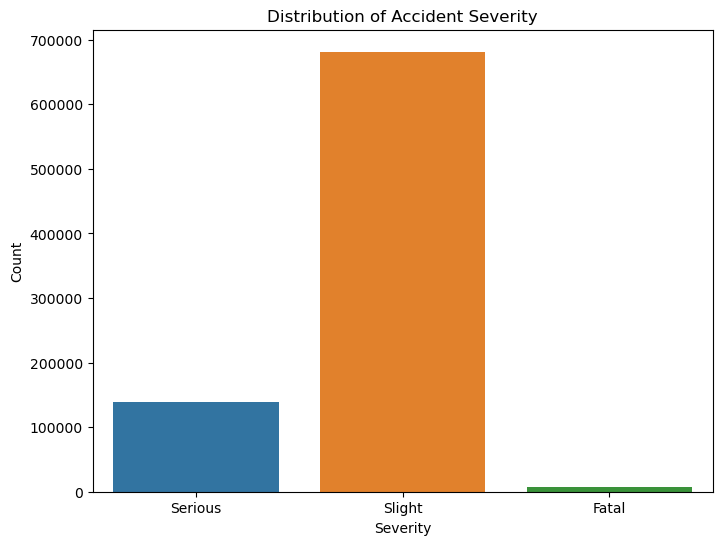

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=merged_df)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

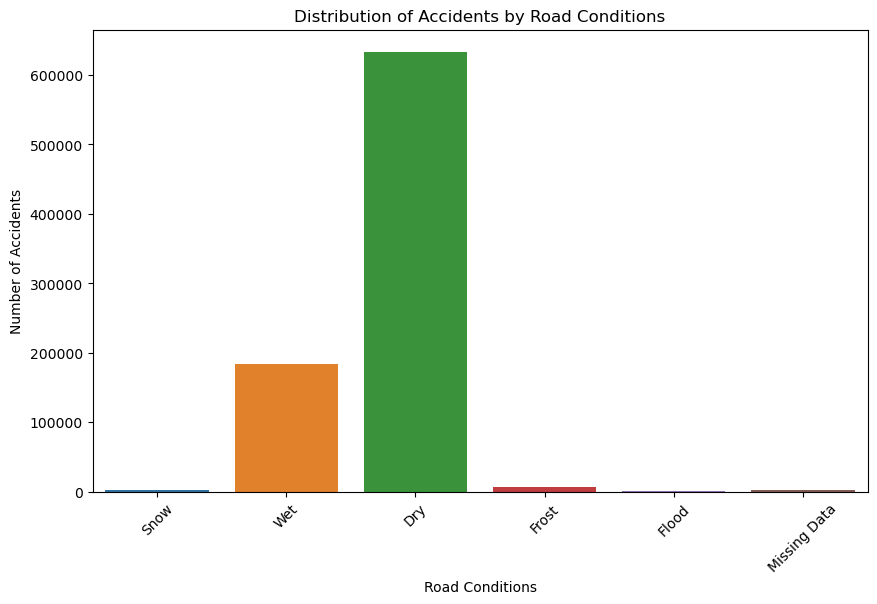

In [21]:
# Visualize the distribution of road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_conditions', data=merged_df)
plt.title('Distribution of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

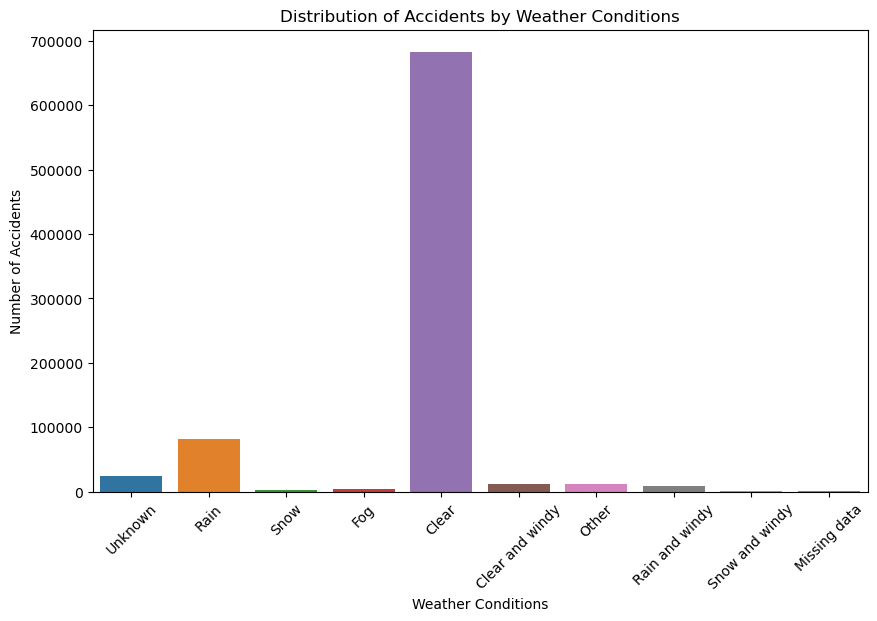

In [22]:
# Visualize distribution of accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=merged_df)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

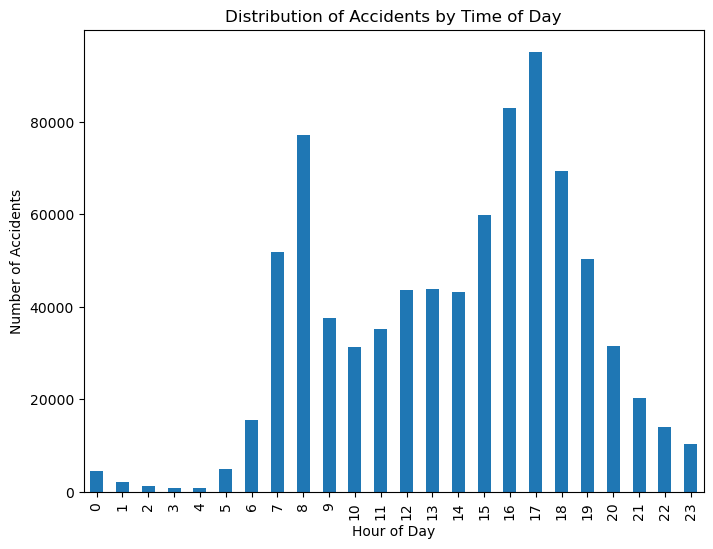

In [23]:
# Visualize distribution of accidents by time of day
plt.figure(figsize=(8, 6))
merged_df['Hour_of_Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

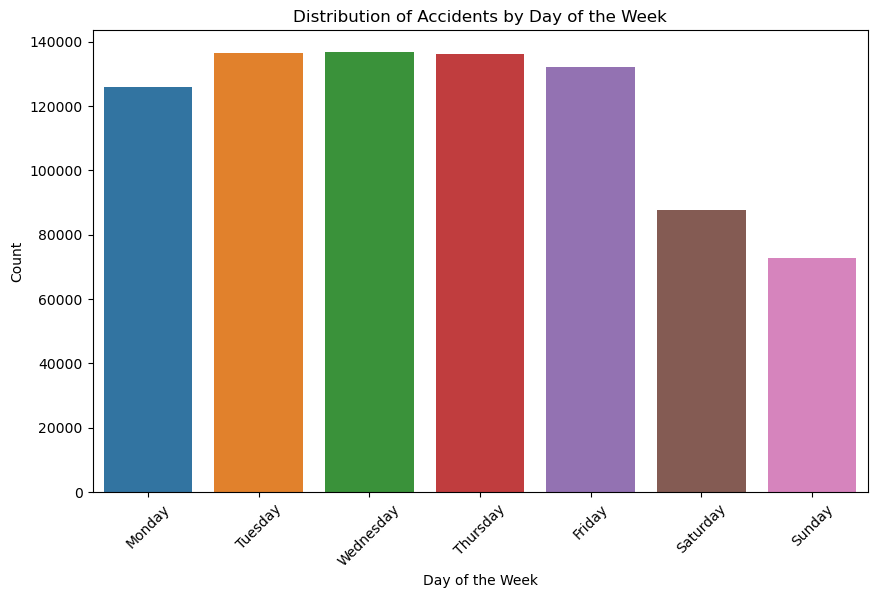

In [24]:
# Visualize the distribution of accidents over days of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=merged_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

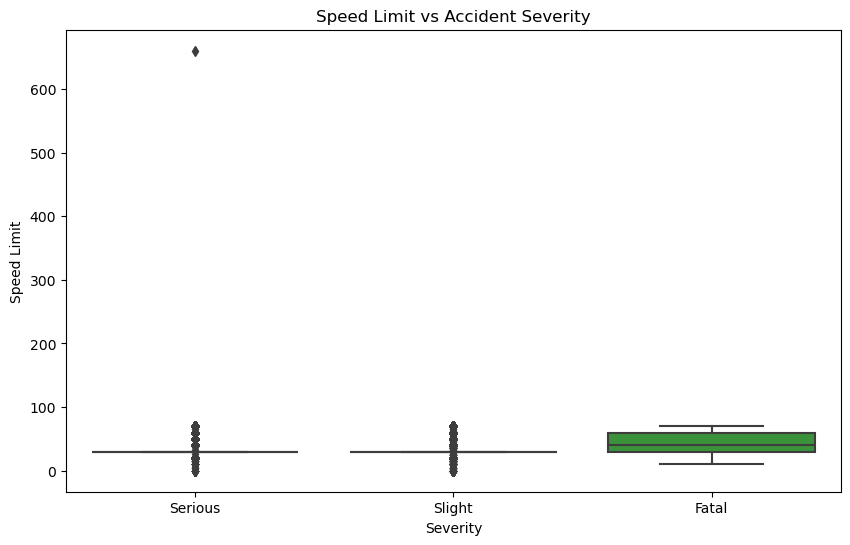

In [25]:
# Visualize the relationship between speed limit and accident severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Speed_limit', data=merged_df)
plt.title('Speed Limit vs Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Speed Limit')
plt.show()

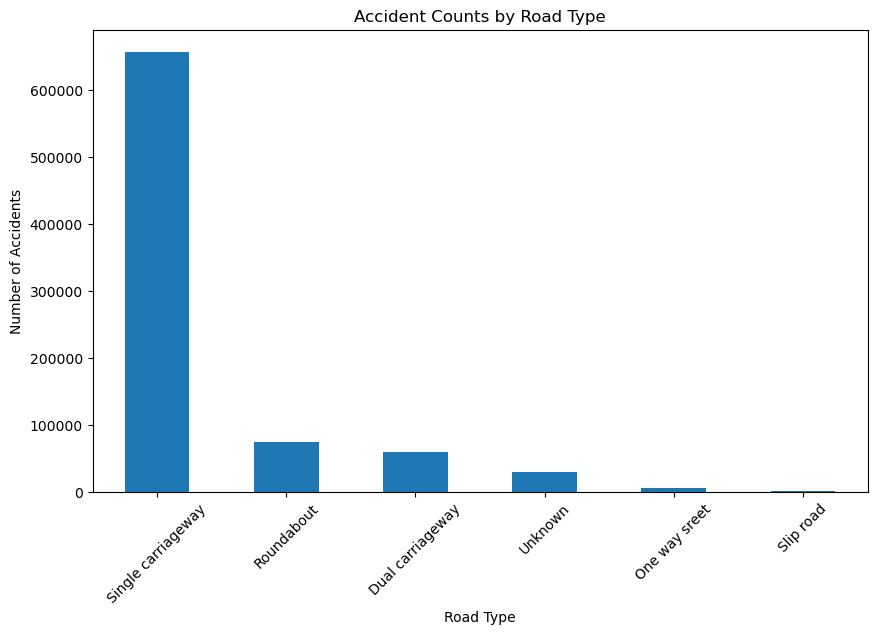

In [26]:
# Visualize accident counts by road type
plt.figure(figsize=(10, 6))
merged_df['Road_type'].value_counts().plot(kind='bar')
plt.title('Accident Counts by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Check the data types of the columns
print(merged_df.dtypes)

Accident_Index                  object
Number_of_Vehicles               int64
Number_of_Casualties             int64
Date                    datetime64[ns]
Time                            object
Speed_limit                    float64
Road_conditions                 object
Weather_conditions              object
Day                             object
Road_type                       object
Light_conditions                object
Severity                        object
Longitude                      float64
Latitude                       float64
Hour_of_Day                      int32
dtype: object


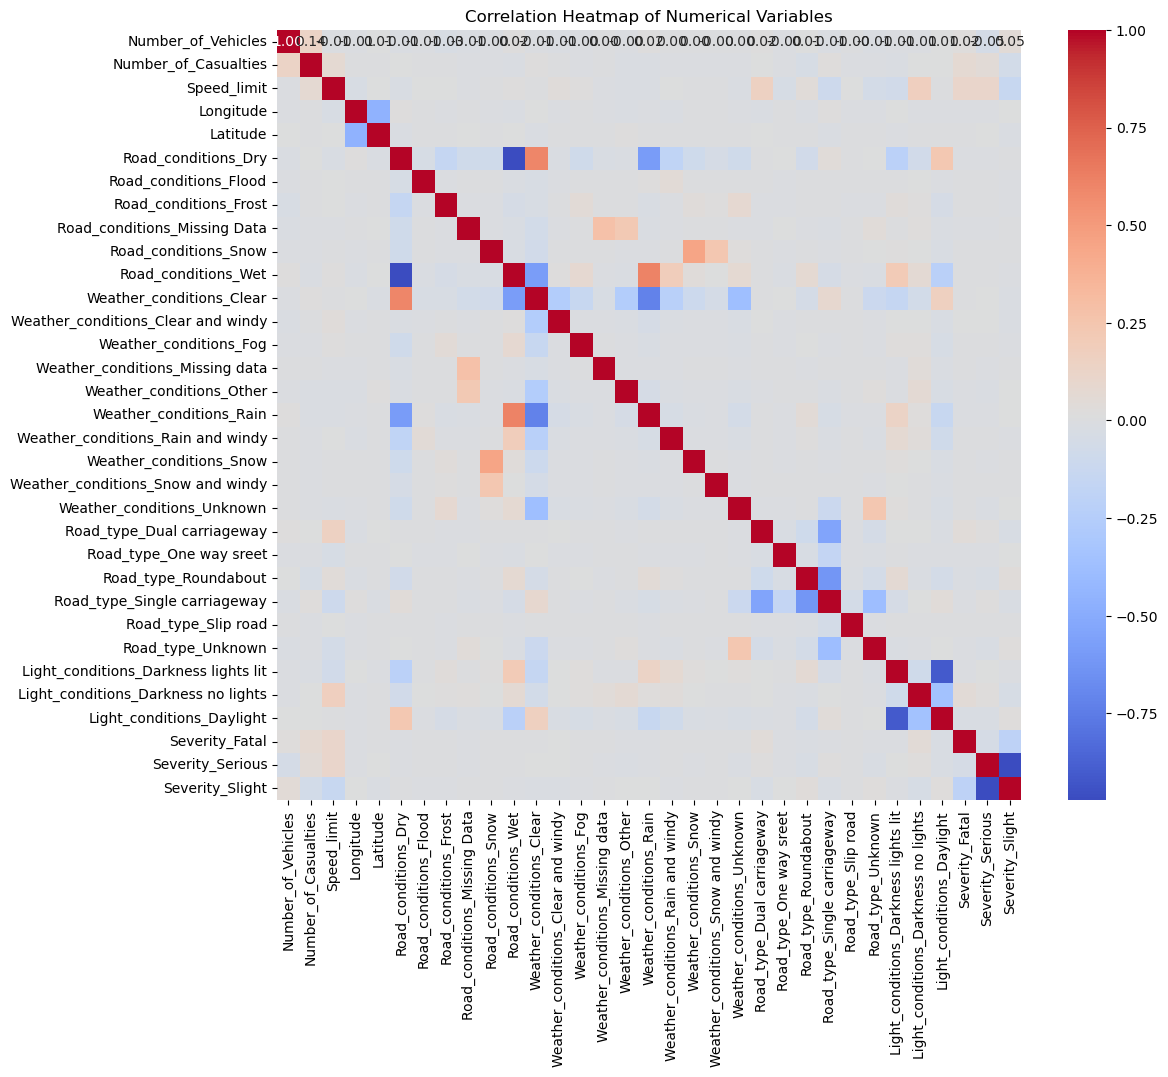

In [28]:
# Select numerical columns for correlation analysis
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Longitude', 'Latitude']

# Encode categorical variables using one-hot encoding
categorical_columns = ['Road_conditions', 'Weather_conditions', 'Road_type', 'Light_conditions', 'Severity']
encoded_categorical = pd.get_dummies(merged_df[categorical_columns])

# Concatenate numerical and encoded categorical variables
merged_data_numeric = pd.concat([merged_df[numerical_columns], encoded_categorical], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [29]:
print(merged_df.head())

  Accident_Index  Number_of_Vehicles  Number_of_Casualties       Date   Time  \
0  197901A1SEE71                   2                     1 1979-01-01  18:20   
1  197901A2JDW40                   1                     1 1979-02-01  09:15   
2  197901A4IJV90                   2                     1 1979-04-01  08:45   
3  197901A4NIE33                   2                     1 1979-04-01  13:40   
4  197901A4SKO47                   2                     1 1979-04-01  18:50   

   Speed_limit Road_conditions Weather_conditions       Day         Road_type  \
0         50.0            Snow            Unknown    Monday  Dual carriageway   
1         30.0            Snow            Unknown   Tuesday           Unknown   
2         30.0            Snow            Unknown  Thursday           Unknown   
3         30.0             Wet            Unknown  Thursday           Unknown   
4         30.0             Wet            Unknown  Thursday           Unknown   

      Light_conditions Severity 

C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


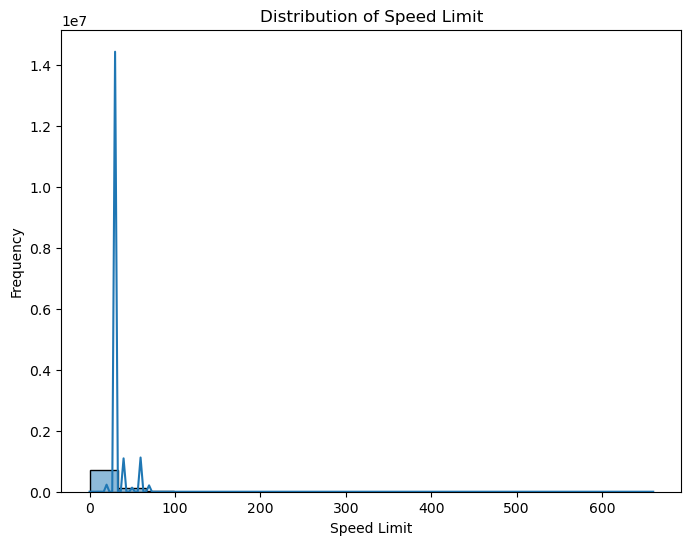

In [30]:
# Histogram of speed limit
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Speed_limit'], bins=20, kde=True)
plt.title('Distribution of Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()

In [31]:
import pandas as pd

# Set the option to handle infinite values as NaN
pd.set_option('mode.use_inf_as_na', True)

C:\Users\Diya\AppData\Local\Temp\ipykernel_29900\2688142341.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

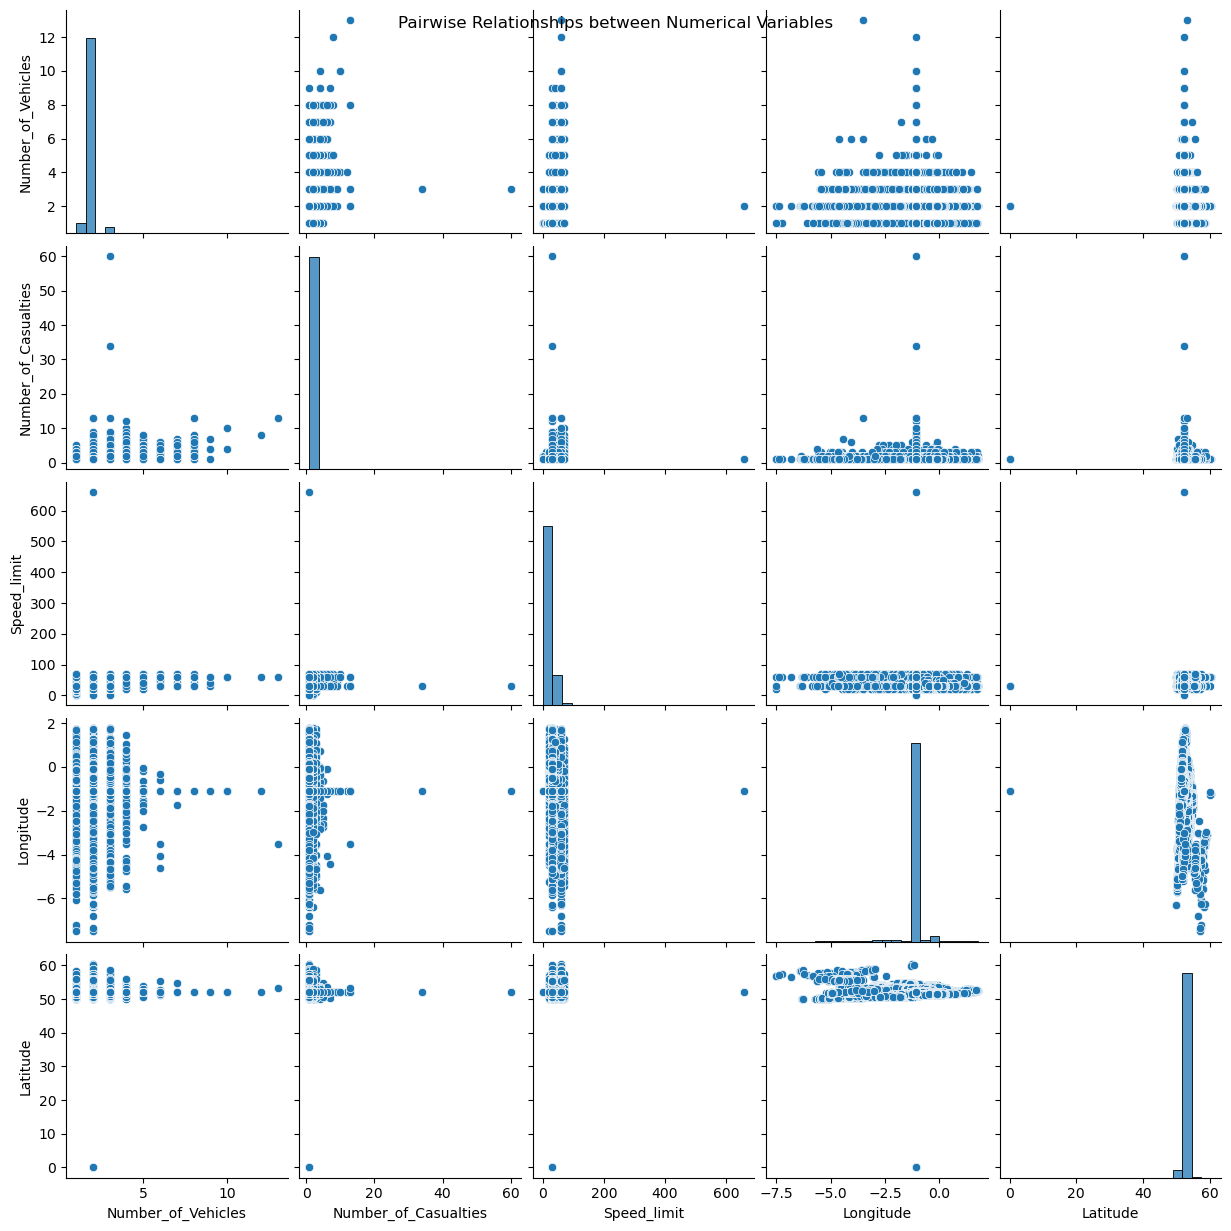

In [32]:
# Scatter plots of numerical variables against each other
sns.pairplot(merged_df[numerical_columns])
plt.suptitle('Pairwise Relationships between Numerical Variables')
plt.show()

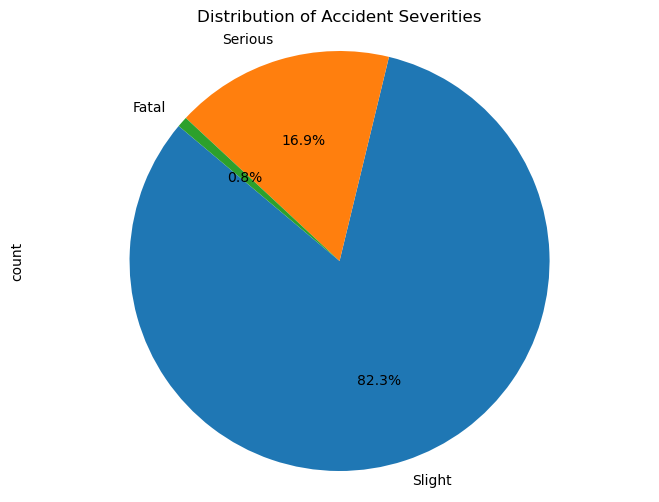

In [33]:
# Pie chart showing distribution of accident severities 
plt.figure(figsize=(8, 6))
merged_df['Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Severities')
plt.axis('equal')
plt.show()

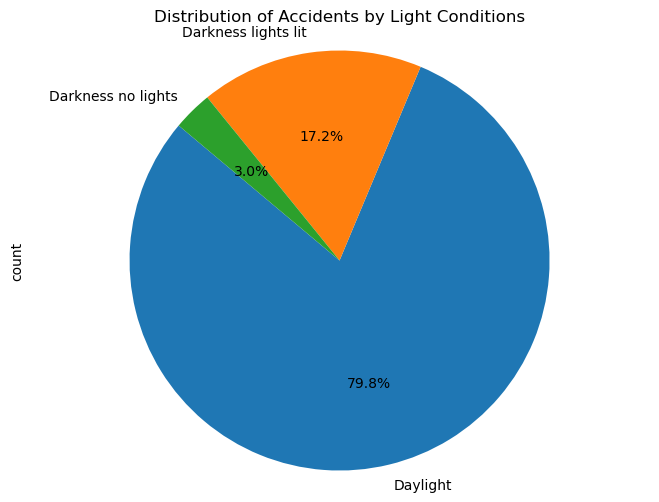

In [34]:
# Step 7: Visualization
# Example: Pie chart showing distribution of accidents by road type in the merged dataset
plt.figure(figsize=(8, 6))
merged_df['Light_conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accidents by Light Conditions')
plt.axis('equal')
plt.show()

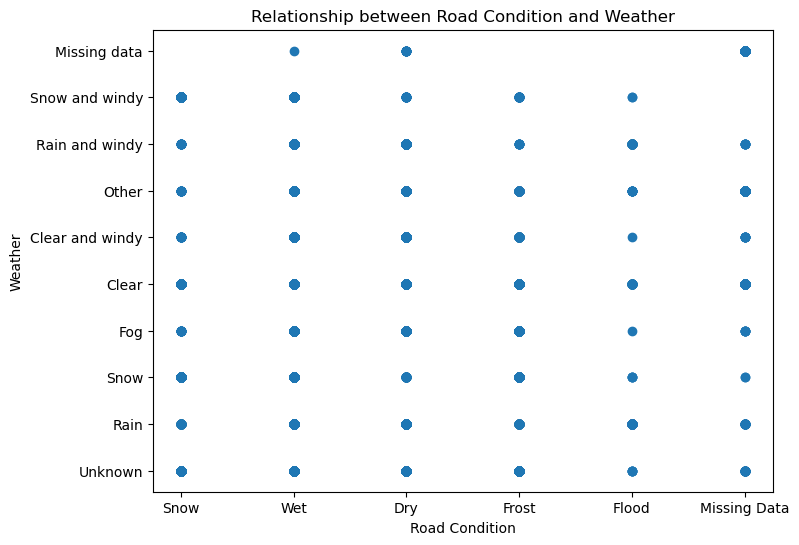

In [35]:
# Visualize the relationship between 'road_condition' and 'weather' using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Road_conditions'], merged_df['Weather_conditions'])
plt.title('Relationship between Road Condition and Weather')
plt.xlabel('Road Condition')
plt.ylabel('Weather')
plt.show()

In [36]:
# Define criteria for identifying hotspot locations based on available columns
# Calculate the number of accidents per day
accidents_per_day = merged_df.groupby('Day')['Accident_Index'].count()

In [37]:
# Define a threshold for identifying hotspot locations
threshold = accidents_per_day.quantile(0.9)

In [38]:
# Identify hotspot days based on the threshold
hotspot_days = accidents_per_day[accidents_per_day > threshold].index.tolist()

In [39]:
# Flag or identify accidents that occur on hotspot days
merged_df['is_hotspot'] = merged_df['Day'].isin(hotspot_days)

In [40]:
#Filter the data to include only accidents that occur in hotspot locations
hotspot_accidents = merged_df[merged_df['is_hotspot'] == True]

In [41]:
print(merged_df)

       Accident_Index  Number_of_Vehicles  Number_of_Casualties       Date  \
0       197901A1SEE71                   2                     1 1979-01-01   
1       197901A2JDW40                   1                     1 1979-02-01   
2       197901A4IJV90                   2                     1 1979-04-01   
3       197901A4NIE33                   2                     1 1979-04-01   
4       197901A4SKO47                   2                     1 1979-04-01   
...               ...                 ...                   ...        ...   
827856  2018983118818                   2                     1 2018-02-07   
827857  2018983119218                   2                     1 2018-07-24   
827858  2018983120618                   2                     1 2018-10-08   
827859  2018983121918                   2                     1 2018-07-18   
827860  2018983133818                   2                     1 2018-12-20   

         Time  Speed_limit Road_conditions Weather_conditions  

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

longitude = merged_df['Longitude']
latitude = merged_df['Latitude']
is_hotspot = merged_df['is_hotspot']  

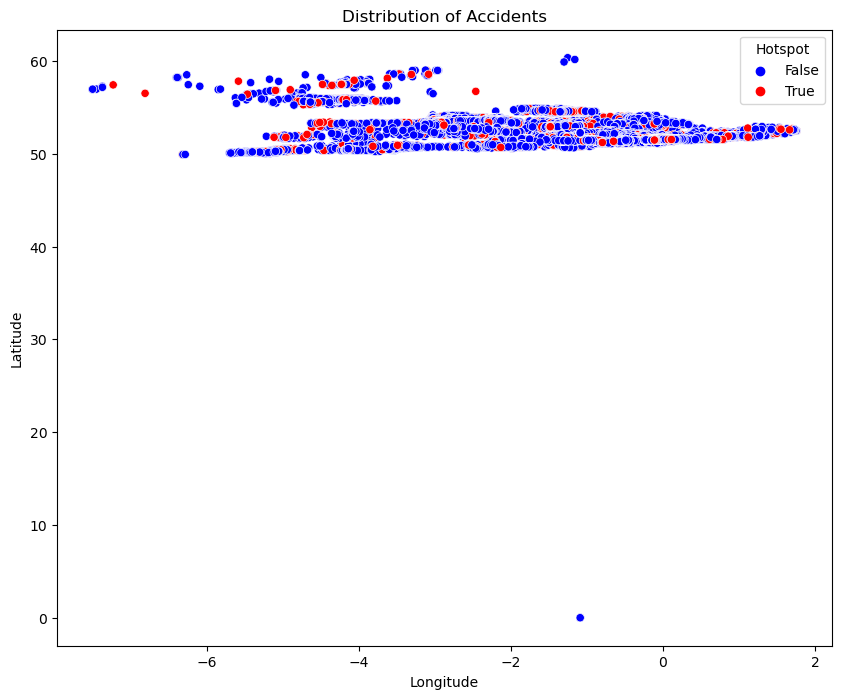

In [43]:
# Create scatter plot of accidents
plt.figure(figsize=(10, 8))
sns.scatterplot(x=longitude, y=latitude, hue=is_hotspot, palette={True: 'red', False: 'blue'}, legend='full')
plt.title('Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Hotspot')
plt.show()

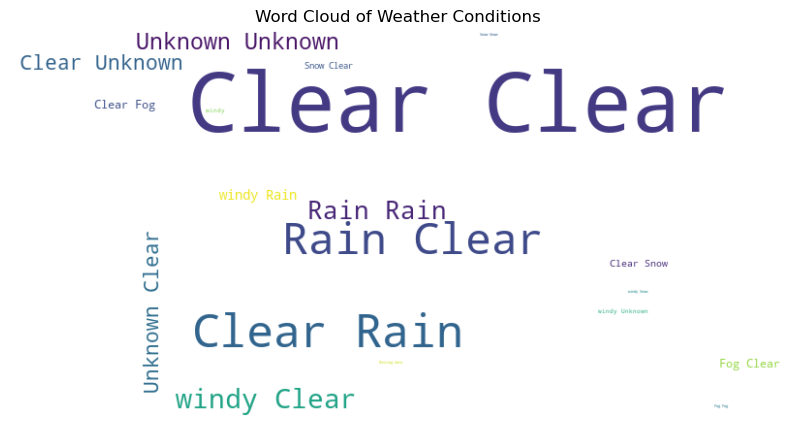

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract categorical data from the 'Weather_conditions' column
categorical_data = merged_df['Weather_conditions'].dropna()

# Concatenate all categorical data into a single string
text = ' '.join(categorical_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weather Conditions')
plt.show()